# Regression Basics III
Lecture notes by
_Sunil Paul_

- The materials in this notebook is mostly prepared using “Diebold, F.X. (2019), Econometric Data Science: A Predictive Modeling Approach, Department of Economics, University of Pennsylvania,
http://www.ssc.upenn.edu/~fdiebold/Textbooks.html.”- 



## Regression in practice
In this section we will see some examples of regression in practice
### Wage equation: Estimation and hypothesis testing
 
 Q: How does education and experience affect wages?
 See pp 42-55 for a detailed discussion

In the first example we regress  log of wage (LWAGE) on equation as years
of schooling (EDUC) and experienc (EXPER) using a total of 1323 observations. Our interest is to examine the role of education and experience on wages.

In [1]:
### we take the data on wages , experience and eduction for our excample
wage95 <- read.csv("DataWages.csv", header=TRUE)
wages <- wage95$WAGE
lnwages <- wage95$LNWAGE
edu <- wage95$EDUC
exper <- wage95$EXPER

reg1 <- lm(LNWAGE~EDUC + EXPER,data=wage95)
summary(reg1)


Call:
lm(formula = LNWAGE ~ EDUC + EXPER, data = wage95)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.96035 -0.32125  0.00331  0.33805  1.64061 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.867382   0.075331   11.51   <2e-16 ***
EDUC        0.093229   0.005045   18.48   <2e-16 ***
EXPER       0.013104   0.001164   11.26   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4923 on 1320 degrees of freedom
Multiple R-squared:  0.2322,	Adjusted R-squared:  0.2311 
F-statistic: 199.6 on 2 and 1320 DF,  p-value: < 2.2e-16


The results above gives the estimates of coeffficients, standard errors, t statistics and the associated P values.
F statistics to test the joint significance are also given. ( I have explained this in the class in detail)

## Some useful results
- Optimized value of the LS objective

$$SSR=\sum_{i=1}^N e_i^2=\sum_{i=1}^N (y_i-\hat{y}_i)^2$$

Sum of squred Explained(regression)
$$SSE=\sum_{i=1}^N (\hat{y}_i-\bar{y})^2$$
Sum of squred Total
$$SST=\sum_{i=1}^N ({y}_i-\bar{y})^2$$

In [2]:
#SSR
deviance(reg1)

[1] 319.9376

#### Std error of the regression
 - variance of of the prediction error $\varepsilon = \sigma^2$
 - Let $s^2$be anestimate of $\sigma^2$ and is given by $$s^2=\frac{\sum_{i=1}^N e_i^2}{N-K}$$
 - Std error of regression is $$\sqrt{s^2}$$

### Goodness of fit
- $R^2$ is a measure of in sample predictability(goodness of fit) 
- it is the percent of the variance of y explained by the variables included in the regression


$$R^2=1-\frac{\frac{1}{N}\sum_{i=1}^N e^2_i}{\frac{1}{N}\sum_{i=1}^N (y_i-\bar{y})^2}$$
$$\bar{R}^2=1-\frac{\frac{1}{N-K}\sum_{i=1}^N e^2_i}{\frac{1}{N-1}\sum_{i=1}^N (y_i-\bar{y})^2}$$

- $R^2$ and $\bar{R}^2$ effectively compare the in-sample accuracy of conditional-mean and unconditional-mean forecasts.
- Both measures have  has MSE as numerator
- $R^2 =0.232$ and  Adjusted $R^2= 0.231$
Alternately we have 
$$R_2=\frac{SSE}{SST}=1-\frac{SSR}{SST}$$( see the definitions above)

## y vs $\hat{y}$
- A perfect fit $(R^2 = 1)$ corresponds to all points on the 45 degree line and no fit $(R^2 = 0)$ corresponds to all points on a vertical line corresponding to $y = \bar{y}$

In [3]:
library(ggplot2)
fit1 <- fitted.values(reg1)# fitted values

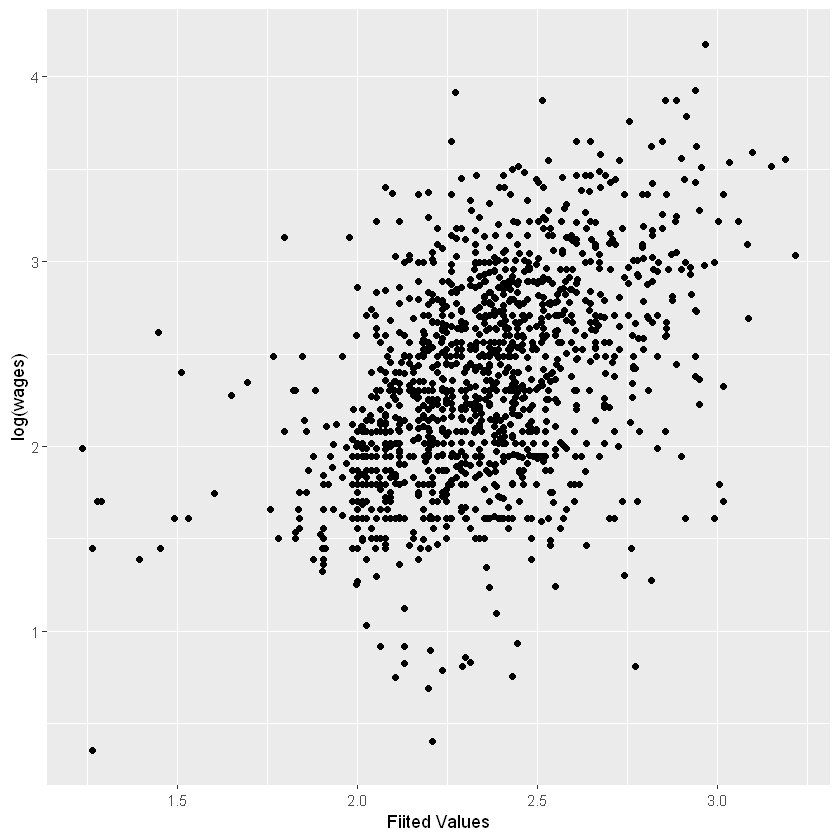

In [4]:
ggplot()+ geom_point(aes(y=lnwages,x=fit1))+xlab("Fiited Values") +
  ylab("log(wages)") 

In [5]:
## Residual plot

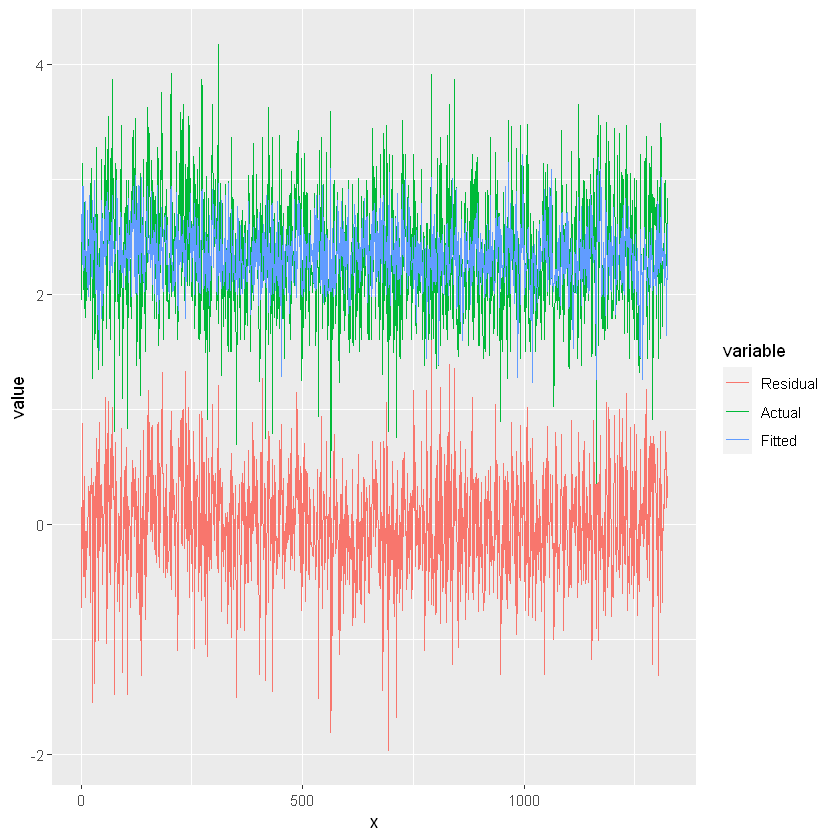

In [6]:
resi_reg1 <- resid(reg1)#residuals
library(reshape2)
x <- 1: length(lnwages)
df_plot <-data.frame(x=x,Residual=resi_reg1,Actual=lnwages, Fitted=fit1)
data_long <- melt(df_plot,id="x")
ggplot(data_long,aes(x=x,y=value,color=variable))+geom_line()

### Example 2: Capital Asset Pricing Model (Adapted from Asteriou and Hall(2021))
- A known theory from financial economics-introduced first by Treynor (1961, 1962) and Sharpe (1966).
- The model is used to determine the appropriate required rate of return of a stock if that stock is intended to be added to an already well-diversified portfolio.
How do we test its empirical validity?
CAPM can be expressed as follows:
$$r_{it}-r_{ft}=\beta_i(r_{mt}-r_{ft})+\varepsilon_{it}$$
where $r_{it}$ represents the returns on stock $i$, $r_{mt}$ represents the return on the market
portfolio, and $r_{ft}$ is the risk-free rate at time period $t$.$\beta_i$ is the beta of stock $i$ and $\varepsilon_{it}$ is the random component of the excess returns.\\

The model decomposes excess return on stock $i$ into a systematic (marketrelated) part, $\beta_i(r_{mt}−r_{f t})$, and a non-systematic part, $\varepsilon_{it}$
_Testable questions_

- Is there a linear relationship between excess returns and systematic risk?
- Is market risk – as measured by β – the only relevant measure of risk?
- Are excess returns and market risk positively related?

__*Empirical stratergy*__

In the first stage, the betas are estimated from a series of time series regressions (we need to estimate a regression for every stock) by regressing past asset returns on past market returns, typically using five years of monthly data. (Obviously longer periods and other frequencies could be used in order to assess the validity of the model in a better way.) The beta is found by the following regression:

$$r_{it}=\alpha_i+\beta_ir_{mt}-+\varepsilon_{it}$$
his regression model is a slight modification of previous equation  in the sense that it
excludes the risk-free rate of return from both sides of the equation. Results from both these specification should yield similar results for the estimates of $\beta_i$ under the assumption that the CAPM is true and the risk-free asset return does not vary over time.

In the second stage of the two-stage regression method, formal testing of the CAPM is based on a cross-sectional regression, using estimated betas and returns from a cross-section of firms at a given time. These CAPM tests typically use the following formulation. Using the average return as the dependent variable and the estimated betas ($\beta_i$s)  as the independent variables, we have the following equation, which is the empirical Security Market Line (SML):
$$\bar{r}_{i}=\gamma_0+\gamma_2 \hat{\beta}_i+e_i;i=1,2,..n$$

The following testable implications can be extracted from this equation Equation
- The intercept ($\gamma_0$) should be equal to zero (i.e. statistically insignificant).
- The slope of the $\beta_i$ variable should be equal to the realized market excess return $(r_{mt} − r_{ft})$.

(An assignment will be given based on this example)


## OLS vs ML estimation
- Under ideal conditions OLS is equivalent to ML
- Maximum-likelihood estimation : find the parameter configuration that maximizes the likelihood of getting the $y_i$’s that you actually did get.
- Linear regression (DGP) under IC implies that:
$$Y_i|X_i \sim iidN(X^{\prime}, \sigma^2)$$
thus the conditional density function can be written as:
$$f(Y_i|X_i)=(2\pi\sigma^2)^{\frac{-1}{2}}e^{\frac{-1}{2\sigma^2}(Y_i-X^{\prime}\beta)^2}$$


Now by independence of the $\varepsilon_i$'s and hence $Y_i$’s,
$$L=f(y_1,...,y_N|X_i)=f(Y_1|X_1)...f(Y_N|X_N)=\prod_{i=1}^{N}(2\pi\sigma^2)^{\frac{-1}{2}}e^{\frac{-1}{2\sigma^2}(Y_i-X^{\prime}\beta)^2}$$ and  Log turns the product into a sum and eliminates the exponential.
$$ln(L)=ln\big((2\pi\sigma^2)^{\frac{-N}{2}}\big)-\frac{1}{2\sigma^2}\sum^N_{i=1}(Y_i-X^{\prime}\beta)^2$$
$$=\frac{-N}{2}ln(2\pi)-\frac{N}{2}ln(\sigma^2)-\frac{1}{2\sigma^2}\sum^N_{i=1}(Y_i-X^{\prime}\beta)^2$$
Note in particular that the $\beta$ vector that maximizes the likelihood (or log likelihood { the optimizers must be identical because the log is a positive monotonic transformation) is the $\beta$vector that minimizes the sum of squared residuals
"MLE and OLS coincide for linear regression under the IC" (Normality assumption under IC, in particular, is crucial).
The codes to estimate the coefficients using ML is given below:

In [7]:
# prepare data  matrix for ML estimation
x <- cbind(1,edu,exper)
y <- as.matrix(lnwages)
ones <- x[,1]

In [8]:
# Specify no of parameter

K <- ncol(x)
K

K1 <- K + 1 
n <- nrow(x) # no of obs

[1] 3

In [9]:
 # log Likelihood function to be optimised
 
llik.reg <- function(par,X,Y) {
Y <- as.vector(y)
X <- as.matrix(x)
xbeta <- X%*%par[1:K]
Sig <- par[K1:K1]
  sum(-(1/2)*log(2*pi)-(1/2)*log(Sig^2)-(1/(2*Sig^2))*(y-xbeta)^2)
}



In [10]:
 # Estimation

model <- optim(c(0,0,0,10),llik.reg, method = "BFGS", control = list(trace=1,maxit=100,fnscale = -1),hessian = TRUE)


initial  value 4300.442187 
iter  10 value 2426.290175
iter  20 value 1101.032278
iter  30 value 938.236056
final  value 938.235848 
converged


The coefficients from this model are the same as those produced through OLS estimation.(You may verify) 

In [11]:
# Calculate the variance matrix from the Hessian matrix. 
v <- -solve(model$hessian)


In [12]:
# Calculate the standard errors from the variance matrix.

se <- sqrt( diag(v))


In [13]:
# Calculate the z statistics from the coefficients and standard errors
b <- model$par

In [14]:
zstat <-b/se


In [15]:
# Calculate p-values for the z statistics

pzstat <- 2* (1 - pnorm(abs(zstat)))


In [16]:
# Put the results together in a table.

table <- cbind(b,se,zstat,pzstat)
table

 

b,se,zstat,pzstat
0.86745744,0.075245275,11.52840,0
0.09322559,0.005039149,18.50027,0
0.01310286,0.001162220,11.27399,0
0.49175949,0.009559821,51.44024,0


##  Predictive aspects
### Naive benchmark forecast
- The sample, or historical, mean of the dependent variable, $\bar{y}$, an estimate of the unconditional mean of y, is a naive benchmark forecast. It is obtained by regressing y on an intercept alone { no conditioning on other regressors}.
- The sample standard deviation of y is a measure of the in-sample accuracy of the unconditional mean forecast $\bar{y}$.
- Sample mean is just LS regression on nothing but an intercept.
- Intercept picks up a "level effect"
- Regression generalizes the sample mean to include predictors other than just a constant
    - Conditional mean: 
$E(y_i|x_i=x^\ast)=x'^\ast \beta$
    - Conditional variance: 
$var(y_i|x_i=x^\ast)=\sigma^2$
    - Full conditional density: 
$y_i|x_i=x^\ast \sim N(x'^\ast \beta,\sigma^2)$

### Point Prediction
If a new person $y_i$ arrives with characteristics $x_i=x^\ast$, what is the best prediction of $y_i$
**The conditional mean is the minimum MSE point predictor**
- LS delivers operational optimal predictor with great generality
- Follows immediately from the LS optimization problem

Non-operational version (remember, in reality we don’t know $\beta$):
$$E(y_i|x_i=x^\ast)=x^\ast\beta$$
Operational version (use $\hat{\beta}_{LS})(regression fitted value at $x_i=x^\ast$):
$$E(y_i|x_i=x^\ast)=x^\ast\hat{\beta}$$

Let us predict the wages of a person with **7** years of experience and **14** years of education

In [17]:
reg1 <- lm(LNWAGE~EDUC + EXPER,data=wage95)
s2<-summary(reg1)$sigma**2 # variance of the regression will be useful later
mydf <- data.frame(EDUC=14,EXPER=7) # dataframe of New values of X matrix
predict(reg1, mydf)# predicts LN(wages)

1 
2.26432

In terms of actual wages this would be:

In [18]:
exp(predict(reg1, mydf))

1 
9.624574

### Interval Prediction
non-operational (with probability 0.95)
$$y_i \in [x^\ast\beta \pm 1.96 \sigma] $$
operational(w.p. 0.95)
$$y_i \in [x^\ast\hat{\beta} \pm 1.96 s] $$

In [19]:
predict(reg1, mydf,interval="predict" ) # Interval of LNWAGES

,fit,lwr,upr
1,2.26432,1.297755,3.230884


In [20]:
exp(predict(reg1, mydf,interval="predict" ))

,fit,lwr,upr
1,9.624574,3.661069,25.30202


### Density Prediction
Density Prediction"
Non-operational version:
$$y_i|x_i=x^\ast \sim N(x^\ast \beta, \sigma^2)$$
Operational version:
$$y_i|x_i=x^\ast \sim N(x^\ast \hat{\beta}, s^2)$$
#### Simulation Algorithm for Feasible Density Prediction With Normality
Consider a density forecast for a person $i$ with characteristics$X=X*$(Its the dataframe_mydf_ in our case

1. Take R draws from $N(0,s^2)$.

In [21]:
step1<- rnorm(1000, 0, s2)

2. Add $X^{*\prime}\hat{\beta}$ to each disturbance draw.

In [22]:
step2<- step1+predict(reg1, mydf)

3. Form a density forecast by fitting a density (or histogram) to the output from step2 above

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


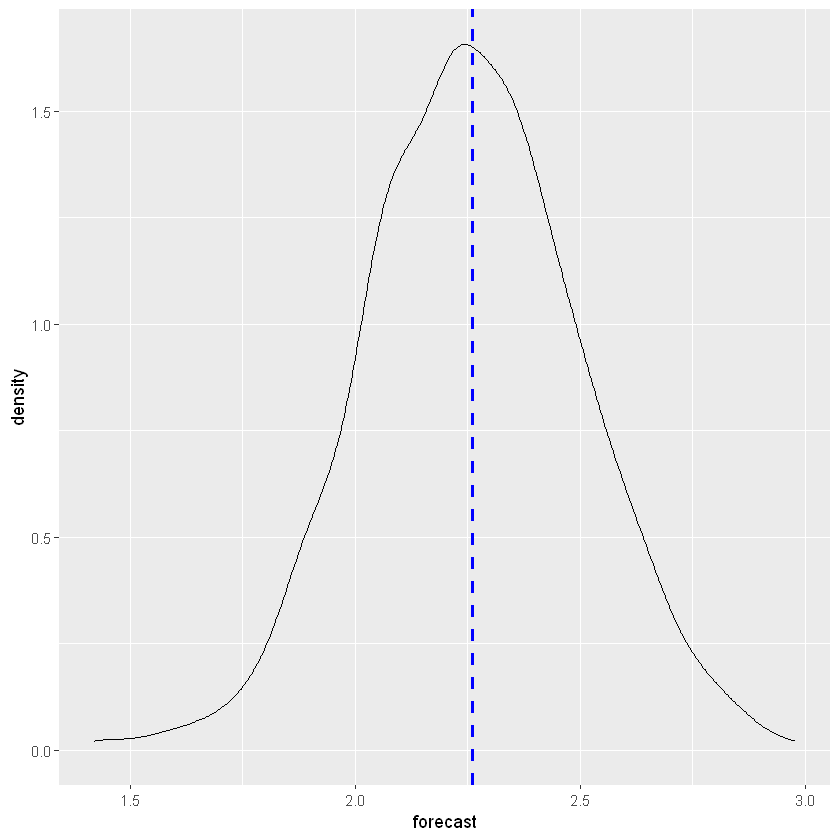

In [23]:
df <- data.frame(
  forecast = step2
 )

step3 <- ggplot(df, aes(x=forecast)) + 
  geom_density()+geom_vline(aes(xintercept=mean(forecast)),
            color="blue", linetype="dashed", size=1)
step3

You can also form an interval forecast (95%, say) by sorting the output from step 2 to get the empirical cdf, and taking the left and right intervalend points as the the .025% and .975% values, respectively. Plot of emprical CDF of the predicted value is given below

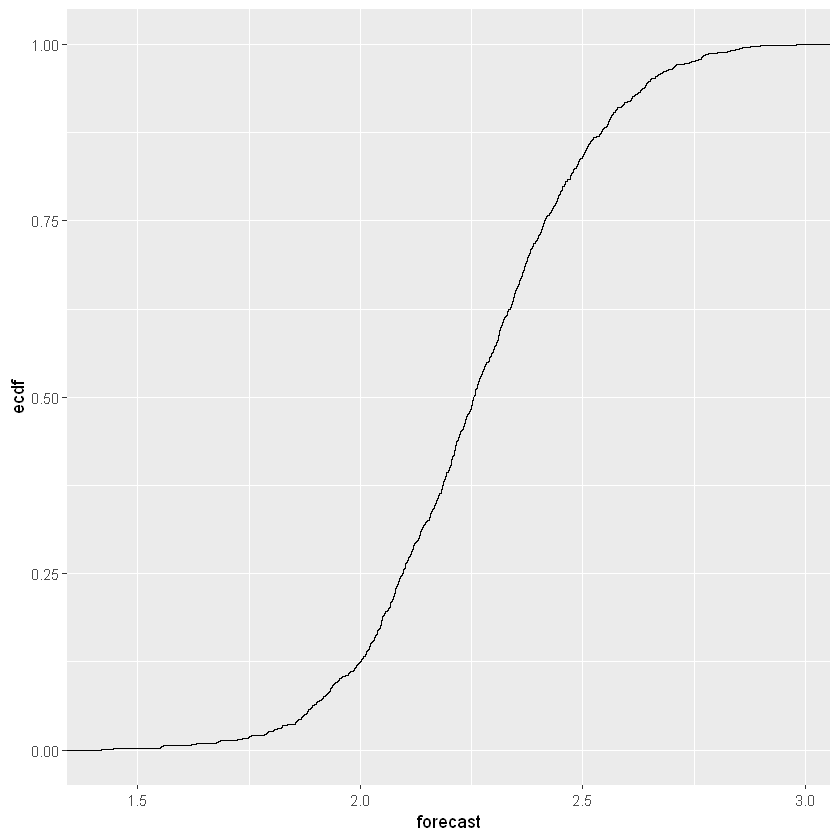

In [24]:
step4 <-ggplot(df, aes(forecast)) + stat_ecdf(geom = "step")
step4

#### Simulation Algorithm for Feasible Density Prediction Without Normality
1. Take R disturbance draws by assigning probability $\frac{1}{N}$ to each regression residual and sampling with replacement.

In [25]:
resi_reg1 <- resid(reg1)# get the residuals
nobs <- length(resi_reg1)# N- no of observation
prob1 <- rep(1/nobs,nobs)
sresi <- sample(resi_reg1,1000,replace=TRUE, prob=prob1)

2. Add $X^{*\prime}\hat{\beta}$ to each draw.

In [26]:
step2_2 <- sresi+predict(reg1, mydf)

3. Form a density forecast by fitting a density to the output from step 2

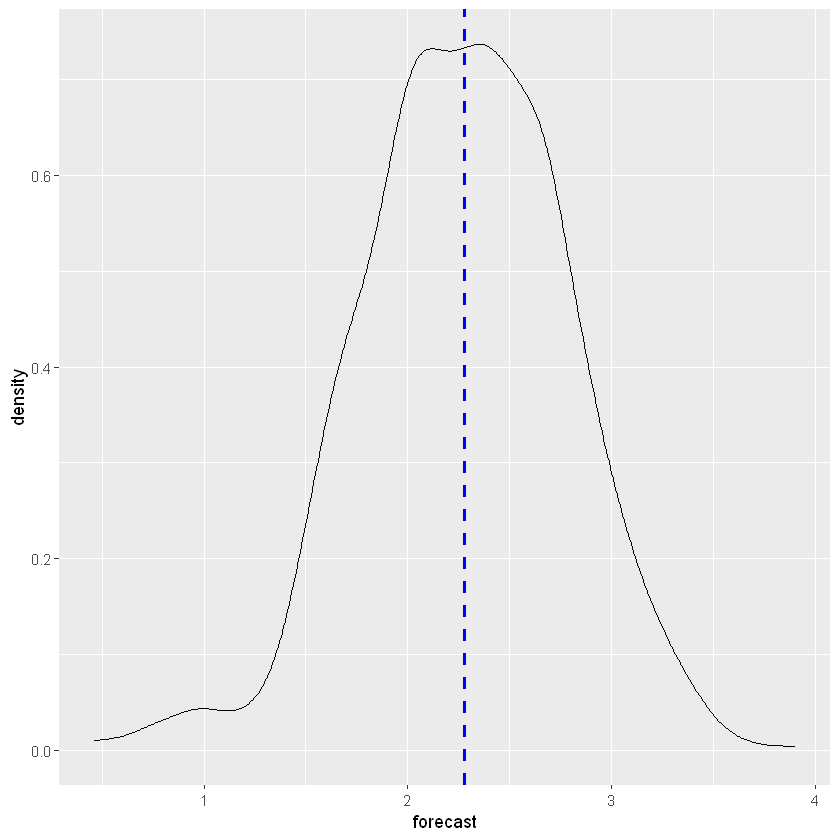

In [27]:
df1 <- data.frame(
  forecast = step2_2
 )

step3_2 <- ggplot(df1, aes(x=forecast)) + 
  geom_density()+geom_vline(aes(xintercept=mean(forecast)),
            color="blue", linetype="dashed", size=1)
step3_2


- The OLS fitted values, $\hat{y}_i = x_i\hat{\beta}$, are effectively in-sample regression predictions.
- OLS coefficient signs and sizes give the weights put on the various x variables in forming the best in-sample prediction of y.
- The standard errors, t statistics, and p-values let us do statistical inference as to which regressors are most relevant for predicting y.
- The OLS residuals, $e_i = y_i − \hat{y}_i$, are effectively in-sample prediction errors corresponding to use of the regression predictions.
- SSR that we discussed earlier measures "total" in-sample predictive accuracy or "squared-error loss" or "quadratic loss"
- SSR is closely related to in-sample mean squared prediction error(MSE):$$MSE=\frac{1}{N}SSR$$
- The F statistic effectively compares the accuracy of the regression-based forecast to that of the unconditional-mean forecast.
- Helps us assess whether the $X$ variables, taken as a set, have predictive value for $Y$.
- Contrasts with the $t$ statistics, which assess predictive value of the $X$ variables one at a time.